In [94]:
import os
os.chdir(r'C:\Users\Navid\Documents\ds_salary_proj')

In [273]:
!conda install seaborn
import pandas as pd
import seaborn as sns

^C


ModuleNotFoundError: No module named 'seaborn'

In [222]:
df1 = pd.read_csv('data_frame2.txt')
df2 = pd.read_csv('data_frame3.txt')

In [223]:
df = df1.append(df2)

In [224]:
df['salary_type'] = [x.split()[1] for x in df['Salary Estimate']]

In [225]:
df['Salary Estimate'] = [x.split()[0] for x in df['Salary Estimate']]

In [226]:
print(df['salary_type'].unique())

['(Glassdoor' 'Per' '(Employer']


In [227]:
df['per_hour'] = [1 if 'Per' in x else 0 for x in df['salary_type']]
df['Employer_reported'] = [1 if 'Employer' in x else 0 for x in df['salary_type']]

In [228]:
#extracting avg salary from slaray estimation
df['avg_salary'] = (df['Salary Estimate'].map(lambda x: x.split('-')[0].lstrip('$').rstrip('k')).astype('int32')
                    +df['Salary Estimate'].map(lambda x: x.split('-')[1].lstrip('$').rstrip('k')).astype('int32'))/2

In [229]:
#now lets find the avg salary of those reported per hour
#we multiply them by 2000 (approximately the number of hourse per year) and devide by 1000 (therefore, we just multiply it by 2)
df['avg_salary'] = df.apply(lambda x: x.avg_salary if x.per_hour == 1 else x.avg_salary*2,axis=1)

In [230]:
df.loc[df['Rating'] == -1, 'Company Name']
# it seems that the companies without rating, only have their name in the Company Name column

5                    NanoMosaic
105                  Kronos Bio
144                 LGC Limited
165          Remix Therapeutics
168     Monte Rosa Therapeutics
                 ...           
227                 LGC Limited
230                       PRPDG
255    Well Established Biotech
296     Monte Rosa Therapeutics
297     Monte Rosa Therapeutics
Name: Company Name, Length: 61, dtype: object

In [231]:
df['Company Name'] = df.apply(lambda x: x['Company Name'] if x['Rating'] == -1 else x['Company Name'].split("\n")[0] , axis = 1)

In [232]:
#df.drop(['Headquarters','Competitors','Salary Estimate'], axis = 1 , inplace = True)

In [233]:
# Since in Location columns there are instacnes wuth differnt structre, such as 'Virgina', we need to replace them with 
# the same structure as others so that we can extract usefull info from them

# We remove the ones without specified location (United States)
df = df[df['Location'] != 'United States']
list_1 = []
for item in df.Location:
    if ',' not in item:
        list_1.append(item)

set(list_1)

{'Colorado',
 'Georgia',
 'Missouri',
 'New Jersey',
 'Puerto Rico',
 'Remote',
 'Utah',
 'Virginia'}

In [234]:
df['state'] = df.apply(lambda x: x['Location'] if ',' not in x['Location']
                       else x['Location'].split(',')[1].lstrip() , axis = 1)
# we create a dict to use for mapping
state_convertor = {'Colorado' : 'CO' , 'Georgia' : 'GA' , 'Missouri' : 'MO' , 'New Jersey' : 'NJ' ,
             'Remote' : 'Remote' , 'Utah' : 'UT' , 'Virginia' : 'VA'}
df['state'] = df['state'].map(lambda x: state_convertor[x] if x in state_convertor else x)

In [235]:
# we are going to work on the size
print(df.Size.value_counts())
# Lets drop those company with unknown or -1 size
df = df[(df['Size'] != '-1') & (df['Size'] != 'Unknown')]
# Lets make a dictionary to convert differnt types of size to numbers, since they are compareable
size_convertor = {'1 to 50 Employees':1 , '51 to 200 Employees':2 , '201 to 500 Employees':3 , 
                 '501 to 1000 Employees':4 , '1001 to 5000 Employees':5 , '5001 to 10000 Employees':6 ,
                 '10000+ Employees':7}
df['Size'] = df['Size'].map(size_convertor)
print(df.Size.value_counts())

10000+ Employees           299
51 to 200 Employees        217
1001 to 5000 Employees     206
201 to 500 Employees       167
501 to 1000 Employees      157
1 to 50 Employees          100
5001 to 10000 Employees     78
-1                          33
Unknown                     19
Name: Size, dtype: int64
7    299
2    217
5    206
3    167
4    157
1    100
6     78
Name: Size, dtype: int64


In [236]:
# Now we want to change the founded year to age of the company
df['Founded'] = df['Founded'].apply(lambda x: -1 if x == -1 else 2020 - x)

In [237]:
#the length of the job description can be a usefull feature
df['desc_length'] = df['Job Description'].apply(lambda x: len(x))

In [238]:
df.Industry.value_counts()

Biotech & Pharmaceuticals                  276
Health Care Services & Hospitals           138
Computer Hardware & Software                80
Enterprise Software & Network Solutions     70
Internet                                    66
                                          ... 
Catering & Food Service Contractors          1
Grantmaking Foundations                      1
Industrial Manufacturing                     1
Beauty & Personal Accessories Stores         1
Farm Support Services                        1
Name: Industry, Length: 74, dtype: int64

In [239]:
df.Sector.value_counts()

Information Technology                278
Biotech & Pharmaceuticals             276
Business Services                     149
Health Care                           138
Manufacturing                          60
Finance                                47
Aerospace & Defense                    46
Insurance                              43
-1                                     40
Retail                                 26
Media                                  25
Government                             24
Education                              19
Oil, Gas, Energy & Utilities           17
Telecommunications                      9
Transportation & Logistics              6
Accounting & Legal                      5
Consumer Services                       5
Restaurants, Bars & Food Services       4
Agriculture & Forestry                  3
Non-Profit                              2
Real Estate                             1
Construction, Repair & Maintenance      1
Name: Sector, dtype: int64

In [240]:
df['Job Title'].value_counts()[:20]

Data Scientist                                                                                         275
Data Engineer                                                                                           53
Senior Data Scientist                                                                                   32
Senior Data Engineer                                                                                    24
Principal Data Scientist                                                                                12
Sr. Data Scientist                                                                                       8
Lead Data Scientist                                                                                      7
Scientist                                                                                                5
Senior Scientist                                                                                         5
Data Analyst/Data Scientist          

In [241]:
# job title convertor
def title_extractor(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'research scientist' in title.lower():
        return 'research scientist'
    elif 'lab scientist' in title.lower() or 'labratory scientist':
        return 'lab scientist'
    else:
        return 'na'
    
    

In [242]:
# seniority extractor
def seniority(title):
    if 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower() or 'sr.' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'junior'
    else:
        return 'na'
    

In [243]:
df['seniority'] = df['Job Title'].apply(seniority)
df['title'] = df['Job Title'].apply(title_extractor)

In [244]:
df.seniority.value_counts()

na        869
senior    346
junior      9
Name: seniority, dtype: int64

In [245]:
df.title.value_counts()

data scientist        558
lab scientist         451
data engineer         161
research scientist     54
Name: title, dtype: int64

In [246]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Revenue,Competitors,salary_type,per_hour,Employer_reported,avg_salary,state,desc_length,seniority,title
0,0,Data Scientist,$57k-$102k,A trusted partner at nearly three million comm...,3.6,Ecolab,"Saint Paul, MN",-1,7,97,...,$10+ billion (USD),-1,(Glassdoor,0,0,159.0,MN,6517,na,data scientist
1,1,Data Scientist,$57k-$102k,As Data Scientist in the Pricing Analytics tea...,4.1,HP Inc.,"San Diego, CA",-1,7,81,...,Unknown / Non-Applicable,-1,(Glassdoor,0,0,159.0,CA,2655,na,data scientist
2,2,Data Scientist,$57k-$102k,Job Brief\n\nThe ideal candidate will have pre...,2.9,IFG Companies,"Atlanta, GA",-1,3,35,...,Unknown / Non-Applicable,-1,(Glassdoor,0,0,159.0,GA,2692,na,data scientist
3,3,Data Scientist,$57k-$102k,Every Analyst a Scientist - One of our primary...,4.5,Systems & Technology Research,"Woburn, MA",-1,3,10,...,$100 to $500 million (USD),-1,(Glassdoor,0,0,159.0,MA,2314,na,data scientist
4,4,Senior Data Scientist,$57k-$102k,"About Us\n\nAt GutCheck, we pioneered agile ma...",3.9,GutCheck,"Denver, CO",-1,2,11,...,$10 to $25 million (USD),-1,(Glassdoor,0,0,159.0,CO,3310,senior,data scientist


In [247]:
df['python'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)

In [248]:
df['r studio'] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)
df['ML'] = df['Job Description'].apply(lambda x: 1 if 'machine' in x.lower() or 'ml' in x.lower() else 0)
df['spark'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
df['deep_learning'] = df['Job Description'].apply(lambda x: 1 if 'tensorflow' in x.lower() or 'pytorch' in x.lower() else 0)


In [249]:
df.ML.value_counts()

1    664
0    560
Name: ML, dtype: int64

In [250]:
#some work on revenue columns
df.Revenue.value_counts()
size_convertor = {'Less than $1 million (USD)':1 , '$1 to $5 million (USD)':2 , '$5 to $10 million (USD)':3 , 
                 '$10 to $25 million (USD)':4 , '$25 to $50 million (USD)':5 , '$50 to $100 million (USD)':6 ,
                 '$100 to $500 million (USD)':7}

<AxesSubplot:>

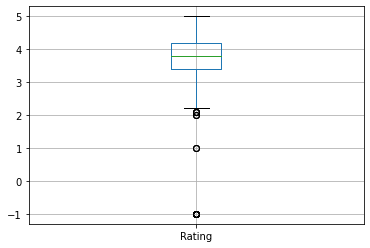

In [251]:
df.boxplot(column = 'Rating')

<AxesSubplot:>

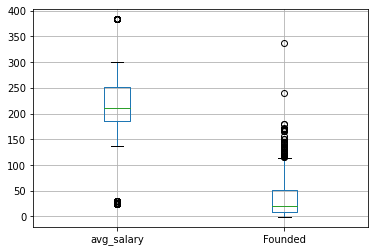

In [252]:
df.boxplot(column = ['avg_salary','Founded'])
# Many outliers for Founded

<AxesSubplot:>

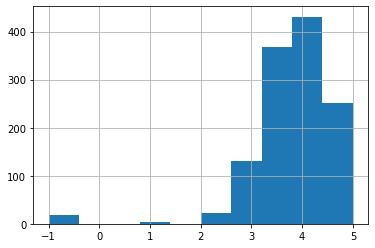

In [253]:
df.Rating.hist()
#pretty much normalized

<AxesSubplot:>

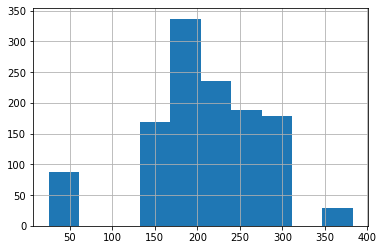

In [254]:
df.avg_salary.hist()

In [255]:
df.corr()['avg_salary']

Unnamed: 0          -0.152141
Rating              -0.003485
Headquarters              NaN
Size                -0.027695
Founded             -0.001514
Competitors               NaN
per_hour            -0.583479
Employer_reported   -0.396005
avg_salary           1.000000
desc_length          0.036355
python               0.007224
r studio            -0.063548
ML                  -0.052188
spark               -0.036143
deep_learning       -0.004114
Name: avg_salary, dtype: float64

In [258]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'salary_type', 'per_hour', 'Employer_reported', 'avg_salary', 'state',
       'desc_length', 'seniority', 'title', 'python', 'r studio', 'ML',
       'spark', 'deep_learning'],
      dtype='object')

In [262]:
df.drop(['Job Title','Salary Estimate','Job Description','Headquarters','Competitors','salary_type'],axis=1,inplace=True)

In [265]:
df_cat = df[['Company Name','Location','Type of ownership', 'Industry', 'Sector','state','seniority',
               'title', 'python', 'r studio', 'ML', 'spark', 'deep_learning','Size']]

In [263]:
#lets draw some bar graphs for the categorical features
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    

Index(['Rating', 'Company Name', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'per_hour',
       'Employer_reported', 'avg_salary', 'state', 'desc_length', 'seniority',
       'title', 'python', 'r studio', 'ML', 'spark', 'deep_learning'],
      dtype='object')

In [267]:
df_cat.Size.value_counts()

7    299
2    217
5    206
3    167
4    157
1    100
6     78
Name: Size, dtype: int64